# Weights are subjective and often need adjustment
There are tools in `pyemu` to assist with weight adjustment to balance the contribution of various groups.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pyemu
import os, shutil
import platform
if 'window' in platform.platform().lower():
    ppp = 'pest++'
else:
    ppp = './pestpp'

setting random seed


### Copy down the base pilot files for the freyberg model with K and R parameters

In [2]:
base_dir = os.path.join('..','..','models','Freyberg','Freyberg_k_and_r')
[shutil.copy2(os.path.join(base_dir,cf),cf) for cf in os.listdir(base_dir)];


### We can read in the base PST file and do a quick run


In [3]:
inpst = pyemu.Pst('freyberg.pst')

Pst.load() warning: duplicate pest++ option found:forecasts


In [4]:
inpst.control_data.noptmax

0

In [5]:
os.system('{0} freyberg.pst'.format(ppp))

0

In [6]:
inpst.phi

98.1802598698

In [7]:
inpst.phi_components

{'flux_cal': 0.0,
 'flux_fore': 0.0,
 'head_cal': 98.1802598698,
 'head_fore': 0.0,
 'travel_fore': 0.0}

In [8]:
inpst.phi_components_normalized

{'flux_cal': 0.0,
 'flux_fore': 0.0,
 'head_cal': 1.0,
 'head_fore': 0.0,
 'travel_fore': 0.0}

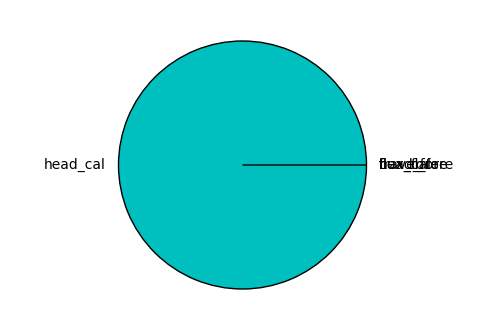

In [9]:
starting_components = inpst.phi_components_normalized
plt.axis('equal')
plt.pie([float(v) for v in starting_components.values()], labels=[k for k in starting_components.keys()]);

In [10]:
groups = ['flux_cal', 'flux_fore', 'head_fore', 'head_cal', 'travel_fore']

In [11]:
new_portions = [0.4,0,0,0.6,0.0]

In [12]:
sum(new_portions)

1.0

In [13]:
newcomponents = dict(zip(groups,[i*inpst.phi for i in new_portions]))

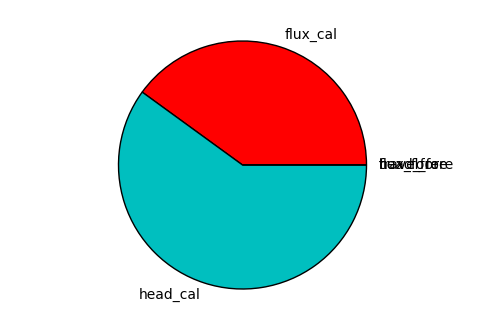

In [14]:
plt.axis('equal')
plt.pie([float(v) for v in newcomponents.values()], labels=[k for k in newcomponents.keys()]);

In [15]:
newcomponents

{'flux_cal': 39.27210394792,
 'flux_fore': 0.0,
 'head_cal': 58.908155921879995,
 'head_fore': 0.0,
 'travel_fore': 0.0}

## Make a new copy of the PST file for output

In [16]:
outpst = pyemu.Pst('freyberg.pst')

Pst.load() warning: duplicate pest++ option found:forecasts


In [17]:
outpst.observation_data.head(14)

,obsnme,obsval,weight,obgnme
obsnme,,,,
cr03c16,cr03c16,22.18672,1.0,head_cal
cr03c10,cr03c10,24.08591,1.0,head_cal
cr04c9,cr04c9,22.33339,1.0,head_cal
cr10c2,cr10c2,31.83430,1.0,head_cal
cr14c11,cr14c11,17.72841,1.0,head_cal
cr16c17,cr16c17,16.56648,1.0,head_cal
cr22c11,cr22c11,18.28594,1.0,head_cal
cr23c16,cr23c16,15.20820,1.0,head_cal
cr25c5,cr25c5,24.24294,1.0,head_cal


In [18]:
outpst.phi_components

{'flux_cal': 0.0,
 'flux_fore': 0.0,
 'head_cal': 98.1802598698,
 'head_fore': 0.0,
 'travel_fore': 0.0}

In [19]:
outpst.adjust_weights_by_list('rivflux_cal',1.0)
outpst.phi_components

{'flux_cal': 810676.941376,
 'flux_fore': 0.0,
 'head_cal': 98.1802598698,
 'head_fore': 0.0,
 'travel_fore': 0.0}

In [20]:
outpst.adjust_weights(obsgrp_dict=newcomponents)
outpst.phi_components

Pst.__reset_weights() warning: phi group travel_fore has zero phi, skipping...
Pst.__reset_weights() warning: phi group flux_fore has zero phi, skipping...
Pst.__reset_weights() warning: phi group head_fore has zero phi, skipping...


{'flux_cal': 39.27210394792,
 'flux_fore': 0.0,
 'head_cal': 58.90815592188001,
 'head_fore': 0.0,
 'travel_fore': 0.0}

In [21]:
outpst.observation_data.head(14)

,obsnme,obsval,weight,obgnme
obsnme,,,,
cr03c16,cr03c16,22.18672,0.774597,head_cal
cr03c10,cr03c10,24.08591,0.774597,head_cal
cr04c9,cr04c9,22.33339,0.774597,head_cal
cr10c2,cr10c2,31.83430,0.774597,head_cal
cr14c11,cr14c11,17.72841,0.774597,head_cal
cr16c17,cr16c17,16.56648,0.774597,head_cal
cr22c11,cr22c11,18.28594,0.774597,head_cal
cr23c16,cr23c16,15.20820,0.774597,head_cal
cr25c5,cr25c5,24.24294,0.774597,head_cal


In [22]:
outpst.phi

98.18025986980001

In [23]:
outpst.write('freyberg_reweighted.pst')

## Relating weights to observation noise

Weights can initially be thought of as the reciprocal of observation noise, as characterized by standard deviation of the observation: 
$w=\frac{1}{\sigma}$

After adjustment, it's a good idea to calculate the equivalent $\sigma$ for each observation to determine whether it remains realistic. In this case:

In [24]:
#initial weight for head
w=1
sig=1/w
sig

1.0

In [25]:
#new weight for head
w=.774597
sig=1/w
sig

1.2909938974718467